In [2]:
import pandas as pd
data=pd.read_csv("Employee.csv")
print("data.head():")
data.head()




data.head():


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print("data.info():")
data.info()


data.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
print("isnull() and sum():")
data.isnull().sum()


isnull() and sum():


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Departments,0
salary,0


In [5]:

print("data value counts():")
data["left"].value_counts()

data value counts():


,count
left,
0,11428
1,3571


In [6]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:


print("data.head() for Salary:")
data["salary"]=le.fit_transform(data["salary"])
data.head()

data.head() for Salary:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [8]:

print("x.head():")
x=data[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years","salary"]]
x.head()


x.head():


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [9]:

y=data["left"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)


In [10]:

print("Accuracy value:")
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

Accuracy value:


0.983

In [11]:


print("Data Prediction:")
dt.predict([[0.5,0.8,9,260,6,0,1,2]])


Data Prediction:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [12]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


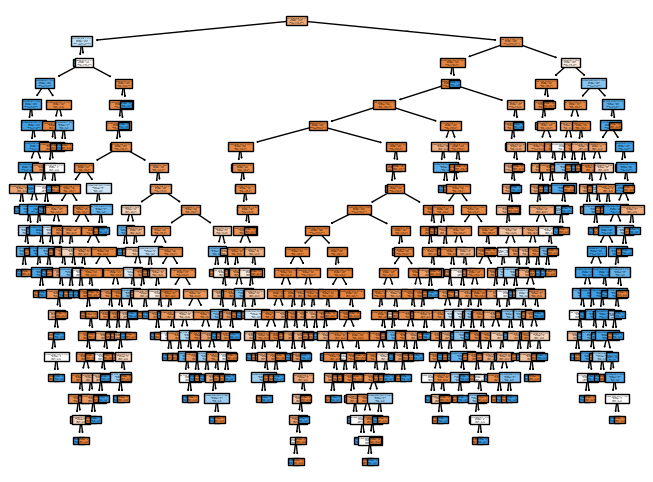

In [13]:


plt.figure(figsize=(8,6))
plot_tree(dt, feature_names=x.columns, class_names=['salary', 'left'], filled=True)
plt.show()
